<a href="https://colab.research.google.com/github/malick08012/NLP-Text-Classification-Spam-vs-Non-Spam-/blob/main/NLP_Text_Classification_(_Spam_vs_Non_Spam_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import Libraries

In [22]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NLP preprocessing
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Sklearn for ML
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Uploading files in Colab
from google.colab import files


#Upload Dataset



In [23]:
# Upload the CSV file
uploaded = files.upload()


Saving spam.csv to spam (2).csv


#Load Data Set

In [24]:
# Load the dataset
df = pd.read_csv('spam.csv', encoding='latin-1')

# Show first few rows
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#Clean the Dataset

In [25]:
# Drop unnecessary columns
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check class distribution
print("\nClass distribution:\n", df['label'].value_counts())


Missing values:
 label      0
message    0
dtype: int64

Class distribution:
 label
ham     4825
spam     747
Name: count, dtype: int64


In [26]:
# Download NLTK resources for stopwords and punkt tokenizer
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

#Text preprocessing

In [29]:
# Initialize the stemmer
stemmer = PorterStemmer()

# Preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation and non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenization
    words = nltk.word_tokenize(text)

    # Remove stopwords and stem the words
    stop_words = set(stopwords.words('english'))
    words = [stemmer.stem(word) for word in words if word not in stop_words]

    # Join words back into a string
    return ' '.join(words)

# Apply preprocessing to the 'message' column
df['processed_message'] = df['message'].apply(preprocess_text)

# Check the changes
df[['message', 'processed_message']].head()


,message,processed_message
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though


#Feature Extraction with TF-IDF

In [30]:
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features for better performance

# Fit and transform the processed text
X = tfidf_vectorizer.fit_transform(df['processed_message']).toarray()

# Labels (Spam vs Ham)
y = df['label'].map({'ham': 0, 'spam': 1}).values  # Convert labels to binary (0 for ham, 1 for spam)

# Check the shape of the feature matrix
print(X.shape)


(5572, 5000)


#Train-Test Split

In [36]:
# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (4457, 5000)
Test data shape: (1115, 5000)


#Naive Bayes Classifier

In [32]:
# Initialize Naive Bayes model
naive_bayes_model = MultinomialNB()

# Train the Naive Bayes model
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = naive_bayes_model.predict(X_test)

# Evaluate the model
print("Naive Bayes Classifier - Evaluation:")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Classifier - Evaluation:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.79      0.88       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



#Logistic Regression Classifier

In [33]:
# Initialize Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)

# Train the Logistic Regression model
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = logreg_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Classifier - Evaluation:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Classifier - Evaluation:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.96      0.65      0.78       150

    accuracy                           0.95      1115
   macro avg       0.95      0.82      0.87      1115
weighted avg       0.95      0.95      0.95      1115



#Confusion matrix

In [34]:

print("Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))


Naive Bayes Confusion Matrix:
[[965   0]
 [ 32 118]]

Logistic Regression Confusion Matrix:
[[961   4]
 [ 52  98]]


#Comparison of Naive Bayes and Logistic Regression

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.79      0.88       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.96      0.65      0.78       150

    accuracy                           0.95      1115
   macro avg       0.95      0.82      0.87      1115
weighted avg       0.95      0.95      0.95      1115



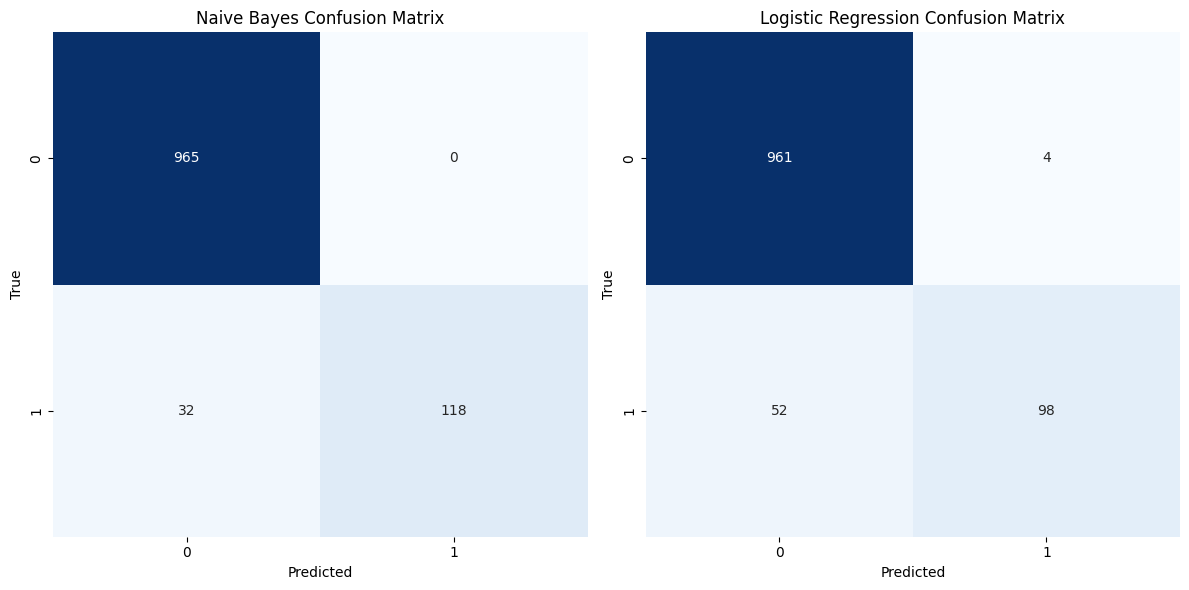

In [35]:
# Print classification reports again for clarity
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrices
plt.figure(figsize=(12, 6))

# Naive Bayes Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')

# Logistic Regression Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()


#Naive Bayes Classifier

> Accuracy:        97%

> Precision (Spam): 100%

> Recall (Spam):     79%

> F1-score (Spam):   88%

#Logistic Regression

> Accuracy:        95%

> Precision (Spam): 96%

> Recall (Spam):     65%

> F1-score (Spam):   78%


